In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [ ]:
mnist=tf.keras.datasets.mnist
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')
xtrain/=255
xtest/=255


In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6912 - accuracy: 0.8090 - val_loss: 0.3065 - val_accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3231 - accuracy: 0.9073 - val_loss: 0.2397 - val_accuracy: 0.9325
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2567 - accuracy: 0.9265 - val_loss: 0.1979 - val_accuracy: 0.9412
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2160 - accuracy: 0.9380 - val_loss: 0.1720 - val_accuracy: 0.9503
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1896 - accuracy: 0.9449 - val_loss: 0.1505 - val_accuracy: 0.9551
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1687 - accuracy: 0.9506 - val_loss: 0.1372 - val_accuracy: 0.9586
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1523 - accuracy: 0.9558 - val_loss: 0.1263 - val_accuracy:

In [ ]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print(test_acc)
print(test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.1054 - accuracy: 0.9677
0.9677000045776367
0.10544245690107346


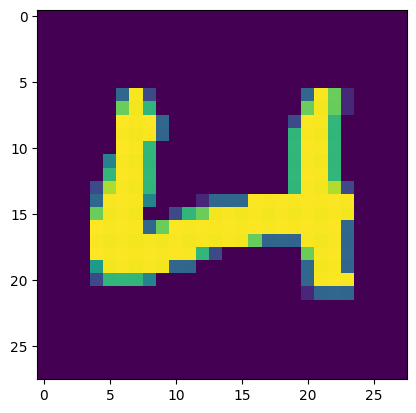

313/313 [==============================] - 1s 2ms/step


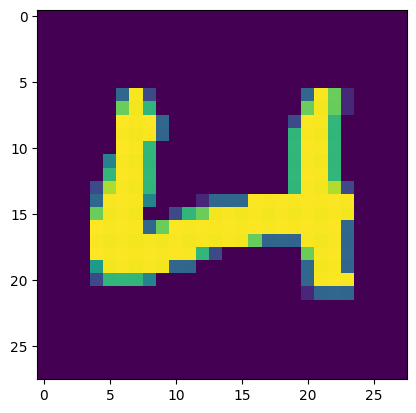

[[1.0194818e-05 1.6365341e-06 7.5991830e-04 ... 9.9694949e-01
  8.4911953e-06 2.1498741e-05]
 [5.3468291e-05 1.0865577e-04 9.9635905e-01 ... 5.1845163e-08
  2.0840560e-04 3.6202092e-09]
 [3.2133539e-06 9.9435681e-01 1.0422862e-03 ... 2.1983723e-03
  1.1987559e-03 3.1168533e-05]
 ...
 [4.3499653e-09 6.5052859e-08 6.0505847e-08 ... 5.1380262e-05
  9.2682254e-05 6.5259566e-04]
 [1.6364473e-05 3.3631925e-06 9.5103196e-08 ... 3.5141593e-07
  1.8376381e-03 6.6403157e-07]
 [1.1552155e-05 2.2855005e-08 3.6183435e-05 ... 8.1330181e-10
  1.5044337e-07 1.1273206e-08]]


In [ ]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()
predicted_value=model.predict(xtest)
plt.imshow(xtest[n])
plt.show()
print(predicted_value)

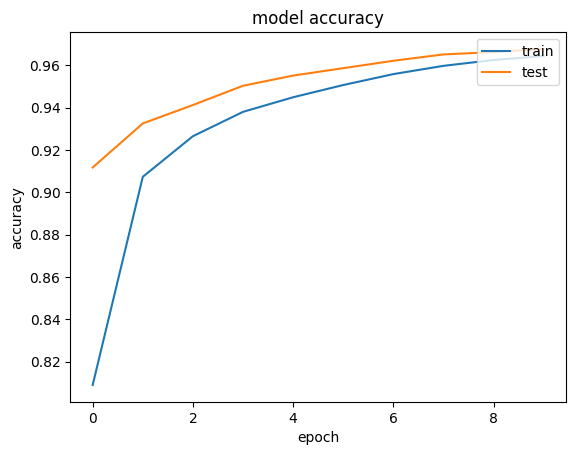

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

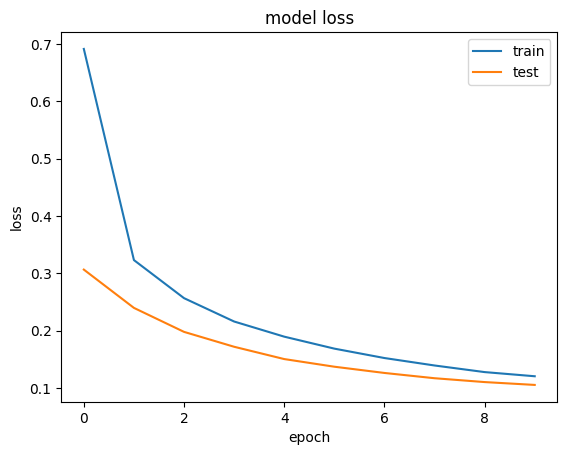

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()